In [ ]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [ ]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H =  np.uint8(imArray_H)
    return imArray_H

In [ ]:
img = cv2.imread('pic/3.jpg')
size =8
if not size%2:
    size +=1
kernel = np.ones((size,size),np.float32)/(size*size)
filtered= cv2.filter2D(img,-1,kernel)
filtered = img.astype('float32') - filtered.astype('float32')
filtered = filtered + 127*np.ones(img.shape, np.uint8)
filtered=np.uint8(filtered)
cv2.imwrite('outputhpass.jpg', filtered)

In [ ]:
plt.imshow(filtered)

In [ ]:
# gray = cv2.cvtColor(filtered,cv2.COLOR_BGR2GRAY)
gray=w2d(filtered,'db1',15)
cv2.imwrite('gray.jpg', gray)
gray=cv2.blur(gray, (5, 3))
(thresh, blackAndWhiteImage) = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((1,2), np.uint8)  # note this is a horizontal kernel
d_im = cv2.dilate(blackAndWhiteImage, kernel, iterations=1)
blackAndWhiteImage = cv2.erode(d_im, kernel, iterations=1)
# blackAndWhiteImage=w2d(blackAndWhiteImage,'db1',10)
cv2.imwrite('blackAndWhiteImage.jpg', blackAndWhiteImage)
edges = cv2.Canny(blackAndWhiteImage,50,150,apertureSize = 5)
cv2.imwrite('edges.jpg', edges)
minLineLength =50
maxLineGap = 20
lines = cv2.HoughLinesP(blackAndWhiteImage,1,np.pi/180,100,minLineLength,maxLineGap)
new_lienes= np.zeros(img.shape, np.uint8)
for linee in lines:

    for x1, y1, x2, y2 in linee:
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 1)
        cv2.line(new_lienes, (x1, y1), (x2, y2), (0, 255, 0), 1)

In [ ]:
cv2.imwrite('linedetector.jpg',img)
plt.imshow(img)
cv2.imwrite('new_lienes.jpg',new_lienes)
new_lienesbw=cv2.imread('new_lienes.jpg',0)

new_lienesbwblur=cv2.blur(new_lienesbw, (7, 7))
cv2.imwrite('new_lienesblur.jpg',new_lienesbwblur)
lines = cv2.HoughLinesP(new_lienesbwblur,1,np.pi/180,100,minLineLength,maxLineGap)
for linee in lines:
    for x1, y1, x2, y2 in linee:
        cv2.line(new_lienes, (x1, y1), (x2, y2), (0, 255, 0), 1)
cv2.imwrite('new_lienes_fin.jpg',new_lienes)
round=20
clear_matrix=np.zeros(new_lienesbw.shape)
kernel = np.ones((1,20), np.uint8)  # note this is a horizontal kernel
d_im = cv2.dilate(new_lienesbw, kernel, iterations=1)
clear_matrix = cv2.erode(d_im, kernel, iterations=1)
for i in range(clear_matrix.shape[1]):
    column = new_lienesbw[:, i]
    for ind in range(0,len(column)-round,round):
        if np.sum(column[ind:ind+round])>1:
            column[ind]=1
            column[ind+1:ind+round]=0
    clear_matrix[:,i]=column
clear_matrix=np.where(clear_matrix>1, 1, clear_matrix)
veheer_count=np.sort(np.sum(clear_matrix,axis=0))-1
# print(clear_matrix)
# print(veheer_count.shape)
counts, bins = np.histogram(veheer_count,bins=150)
# print(veheer_count)
fit = stats.norm.pdf(veheer_count, np.mean(veheer_count), np.std(veheer_count))
plt.figure()
plt.plot(veheer_count,fit,'-o')
plt.hist(bins[:-1], bins, weights=counts/100)
ans=np.ceil(veheer_count[np.argmax(fit)])
# print(np.ceil(veheer_count[np.argmax(fit)]))
(h, w) = clear_matrix.shape
center = (int(w / 2), int(h / 2))
font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = center
fontScale              = 1
fontColor              = (255,255,255)
lineType               = 2
clear_matrix=clear_matrix*255
cv2.putText(clear_matrix,str(ans),bottomLeftCornerOfText,
    font,
    fontScale,
    fontColor,
    lineType)
# cv2.imshow('clear_matrix.jpg',clear_matrix)

In [ ]:
cv2.imwrite('clear_matrix.jpg',clear_matrix)
plt.imshow(clear_matrix)

In [ ]:
cv2.putText(filtered,str(ans),bottomLeftCornerOfText,
    font,
    fontScale,
    fontColor,
    lineType)
plt.imshow(filtered)


In [ ]:
from veneer import Veneer


In [ ]:
veneer=Veneer('pic/1.png')

In [ ]:
bw=veneer.filt_img()
plt.imshow(bw,cmap='Greys')

In [ ]:
lineimg,lines=veneer.edge_detector(bw)
plt.imshow(lineimg,cmap='Greys')

In [ ]:
ans,img,fe,fig=veneer.count_veneer(lines)
plt.imshow(img)
fig.show()

In [ ]:
veneer=Veneer('pic/2.png')

In [ ]:
bw=veneer.filt_img()
plt.imshow(bw,cmap='Greys')

In [ ]:
lineimg,lines=veneer.edge_detector(bw,minLineLength=10,maxLineGap=5)
plt.imshow(lineimg,cmap='Greys')

In [ ]:
ans,img,fe,fig=veneer.count_veneer(lines)
plt.imshow(img)
fig.show()
print(ans)

In [ ]:
veneer=Veneer('pic/3.jpg')

In [ ]:
bw=veneer.filt_img()
plt.imshow(bw,cmap='Greys')

In [ ]:
lineimg,lines=veneer.edge_detector(bw,minLineLength=100,maxLineGap=20)
plt.imshow(lineimg,cmap='Greys')

13.0


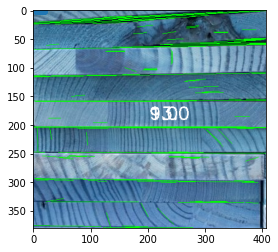

In [47]:
ans,img,fe,figg=veneer.count_veneer(lines,minLineLength=100,maxLineGap=20)
plt.imshow(img)

print(ans)